In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from py_cFBA import *

In [3]:
def cFBA_mix(sbml_file, ac, substrate_name, substrate_level):
    # Quotas for the model (min based from Acevedo 2012)
    quotas = [
    #   ['type',     'metabolite', time, value]
        ['equality', 'Acetate',      0,    ac],
        ['equality', 'Acetate',      1,    0],
        ['equality', substrate_name, 0,    substrate_level],
        ['equality', substrate_name, 1,    0],
        ['min',      'Glyc',         0,    0.012],
        ['min',      'PolyP',        0,    0.1],
        ['min',      'PHB',          0,    0.006],
        ['min',      'PH2MV',        0,    0.006],
    ]

    # Generate the Linear Programming (LP) model components for cFBA
    cons, Mk, imbalanced_mets, nm, nr, nt = generate_LP_cFBA(sbml_file, quotas, dt)

    # Find the optimal alpha value
    alpha, prob = find_alpha(cons, Mk, imbalanced_mets)

    # Retrieve the solution (fluxes, amounts, and time points)
    fluxes, amounts, t = get_fluxes_amounts(sbml_file, prob, dt)

    # Store the solution of fluxes and amounts
    solution = {
        'alpha': alpha,
        'fluxes': fluxes,
        'amounts': amounts,
        'time_points': t
    }

    return solution

def simulate_substrate(file_name, substrate_name, dor_S, n_sim):
    sol = [] # empty list to store solutions
    
    dor_ac = 8 # e/mol

    # Based on Acevedo 2012
    ac_load = 0.087               # mol ac / cmolx
    cod_load = ac_load * dor_ac   # mol ac / cmolx  ->  e- mol / cmolx
   
    # Determine acetate and substrate concentrations (always same electron load)
    acetate = np.linspace(0, ac_load, n_sim)
    substrate = (cod_load - (acetate * dor_ac)) / dor_S
    perc_acetate = (acetate * dor_ac) / cod_load * 100
    perc_substrate = (substrate * dor_S) / cod_load * 100
    
    alpha_values = []
    
    for i in range(n_sim):
        solution = cFBA_mix(file_name, acetate[i], substrate_name, substrate[i])
        sol.append(solution)
        alpha_values.append(solution['alpha'])
        
    return sol, alpha_values, perc_substrate



0.04 min
0.04 min
0.03 min
0.03 min
0.03 min


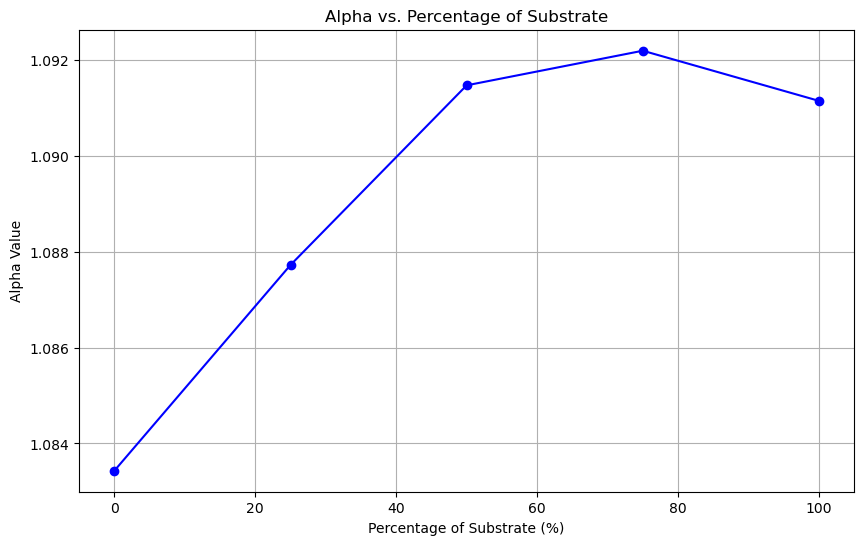

In [4]:
# Simulate substrate and get alpha and perc_substrate values
dt = 1
file_name = 'cFBA_base_aspartate.xml'
substrate_name = 'Asp_ext'
dor_S = 12
n_sim = 5

sol, alpha_values, perc_substrate = simulate_substrate(file_name, substrate_name, dor_S, n_sim)

# Plot alpha vs perc_substrate
plt.figure(figsize=(10, 6))
plt.plot(perc_substrate, alpha_values, marker='o', linestyle='-', color='b')
plt.xlabel('Percentage of Substrate (%)')
plt.ylabel('Alpha Value')
plt.title('Alpha vs. Percentage of Substrate')
plt.grid(True)
plt.show()


In [10]:
# Organize input variables in a dictionary
substrates_info = {
    'akg': {'file': 'cFBA_base_akg.xml', 'dor': 16, 'met_name': 'S_ext'},
    'aspartate': {'file': 'cFBA_base_aspartate.xml', 'dor': 12, 'met_name': 'Asp_ext'},
    'butyrate': {'file': 'cFBA_base_butyrate.xml', 'dor': 20, 'met_name': 'S_ext'},
    'citrate': {'file': 'cFBA_base_citrate.xml', 'dor': 18, 'met_name': 'S_ext'},
    'fumarate': {'file': 'cFBA_base_fumarate.xml', 'dor': 12, 'met_name': 'S_ext'},
    'glutamate': {'file': 'cFBA_base_glutamate.xml', 'dor': 18, 'met_name': 'Glut_ext'},
    'lactate': {'file': 'cFBA_base_lactate.xml', 'dor': 12, 'met_name': 'S_ext'},
    'malate': {'file': 'cFBA_base_malate.xml', 'dor': 12, 'met_name': 'S_ext'},
    'oxaloacetate': {'file': 'cFBA_base_oxaloacetate.xml', 'dor': 10, 'met_name': 'S_ext'},
    'propionate': {'file': 'cFBA_base_propionate.xml', 'dor': 14, 'met_name': 'Prop_ext'},
    'pyruvate': {'file': 'cFBA_base_pyruvate.xml', 'dor': 10, 'met_name': 'S_ext'},
    'succinate': {'file': 'cFBA_base_succinate.xml', 'dor': 14, 'met_name': 'S_ext'},
}

# Store results in a dictionary
results = {}

# Simulate each substrate and store the results
dt = 1
n_sim = 20

for substrate, info in substrates_info.items():
    file_name = info['file']
    dor_S = info['dor']
    sol, alpha_values, perc_substrate = simulate_substrate(file_name, info['met_name'], dor_S, n_sim)
    results[substrate] = {
        'sol': sol,
        'alpha_values': alpha_values,
        'perc_substrate': perc_substrate
    }



0.03 min
0.03 min
0.03 min
0.03 min
0.03 min
0.03 min
0.03 min
0.03 min
0.04 min
0.03 min
0.03 min
0.03 min
0.04 min
0.03 min
0.04 min
0.03 min
0.04 min
0.03 min
0.03 min
0.03 min
0.06 min
0.04 min
0.04 min
0.05 min
0.04 min
0.03 min
0.04 min
0.03 min
0.04 min
0.04 min
0.03 min
0.03 min
0.04 min
0.03 min
0.03 min
0.04 min
0.04 min
0.04 min
0.04 min
0.04 min
0.03 min
0.04 min
0.03 min
0.04 min
0.03 min
0.04 min
0.04 min
0.04 min
0.04 min
0.03 min
0.04 min
0.04 min
0.03 min
0.04 min
0.04 min
0.04 min
0.04 min
0.04 min
0.05 min
0.04 min
0.04 min
0.04 min
0.06 min
0.04 min
0.07 min
0.04 min
0.03 min
0.04 min
0.04 min
0.04 min
0.04 min
0.04 min
0.03 min
0.04 min
0.04 min
0.04 min
0.03 min
0.04 min
0.04 min
0.04 min
0.05 min
0.05 min
0.09 min
0.04 min
0.04 min
0.04 min
0.03 min
0.03 min
0.03 min
0.03 min
0.04 min
0.04 min
0.04 min
0.04 min
0.04 min
0.03 min
0.03 min
0.03 min
0.03 min
0.03 min
0.03 min
0.07 min
0.04 min
0.06 min
0.04 min
0.03 min
0.03 min
0.03 min
0.03 min
0.03 min
0.03 min
0

In [24]:
import pickle


# Function to save results using Pickle
def save_results_pickle(results, filename='results_multiple_substrates.pkl'):
    with open(filename, 'wb') as file:
        pickle.dump(results, file)

# Function to load results using Pickle
def load_results_pickle(filename='results_multiple_substrates.pkl'):
    with open(filename, 'rb') as file:
        return pickle.load(file)

# Save the results
save_results_pickle(results)

# Load the results
# results_loaded = load_results_pickle()

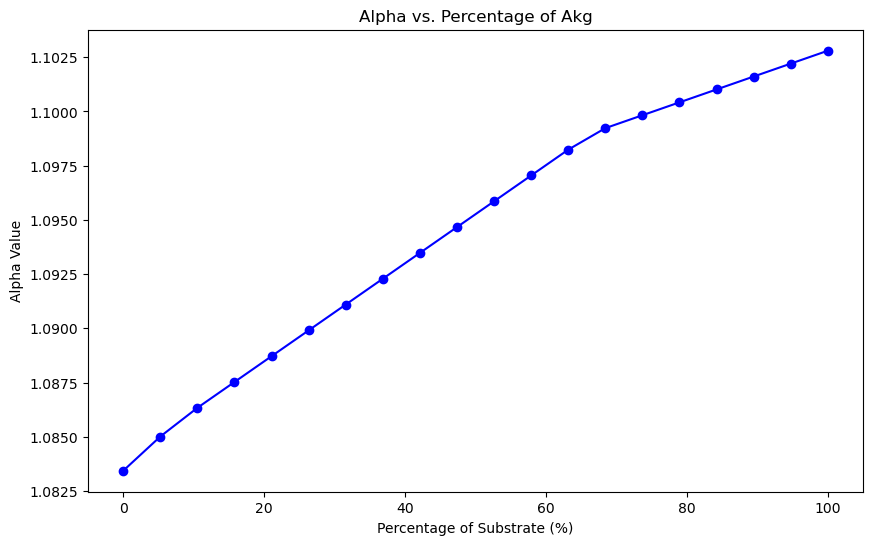

In [13]:
# Example of how to plot for a specific substrate
def plot_alpha_vs_perc_substrate(substrate):
    alpha_values = results[substrate]['alpha_values']
    perc_substrate = results[substrate]['perc_substrate']
    plt.figure(figsize=(10, 6))
    plt.plot(perc_substrate, alpha_values, marker='o', linestyle='-', color='b')
    plt.xlabel('Percentage of Substrate (%)')
    plt.ylabel('Alpha Value')
    plt.title(f'Alpha vs. Percentage of {substrate.capitalize()}')
#     plt.grid(True)
#     plt.show()

# Plot for a specific substrate, e.g., aspartate
plot_alpha_vs_perc_substrate('akg')

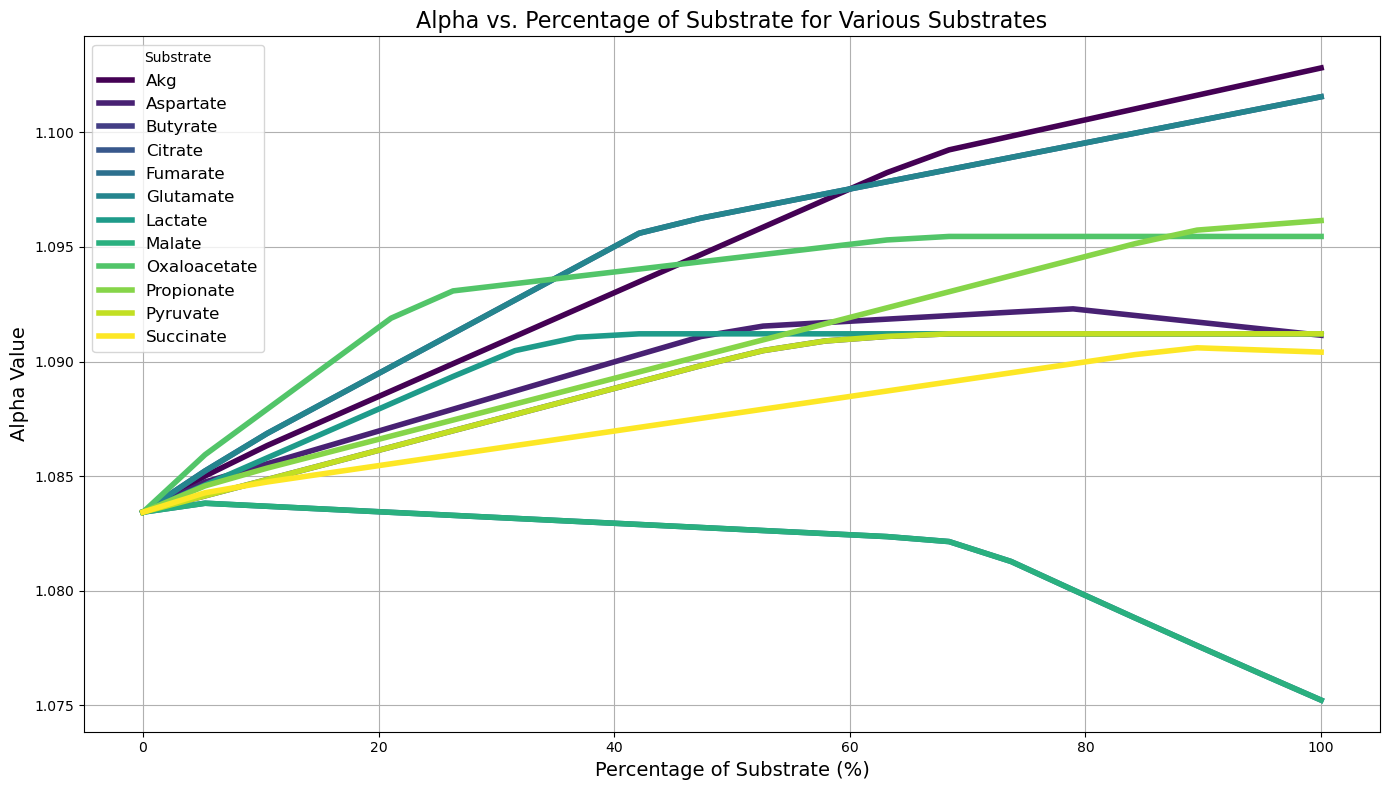

In [16]:
# Define a function to plot alpha vs perc_substrate for all substrates
def plot_all_substrates(results):
    plt.figure(figsize=(14, 8))
    colors = plt.cm.viridis(np.linspace(0, 1, len(results)))
    
    for i, (substrate, data) in enumerate(results.items()):
        alpha_values = data['alpha_values']
        perc_substrate = data['perc_substrate']
        plt.plot(perc_substrate, alpha_values, linestyle='-', linewidth = 4, color=colors[i], label=substrate.capitalize())

    plt.xlabel('Percentage of Substrate (%)', fontsize=14)
    plt.ylabel('Alpha Value', fontsize=14)
    plt.title('Alpha vs. Percentage of Substrate for Various Substrates', fontsize=16)
    plt.legend(title='Substrate', fontsize=12)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Call the function to plot all substrates
plot_all_substrates(results)

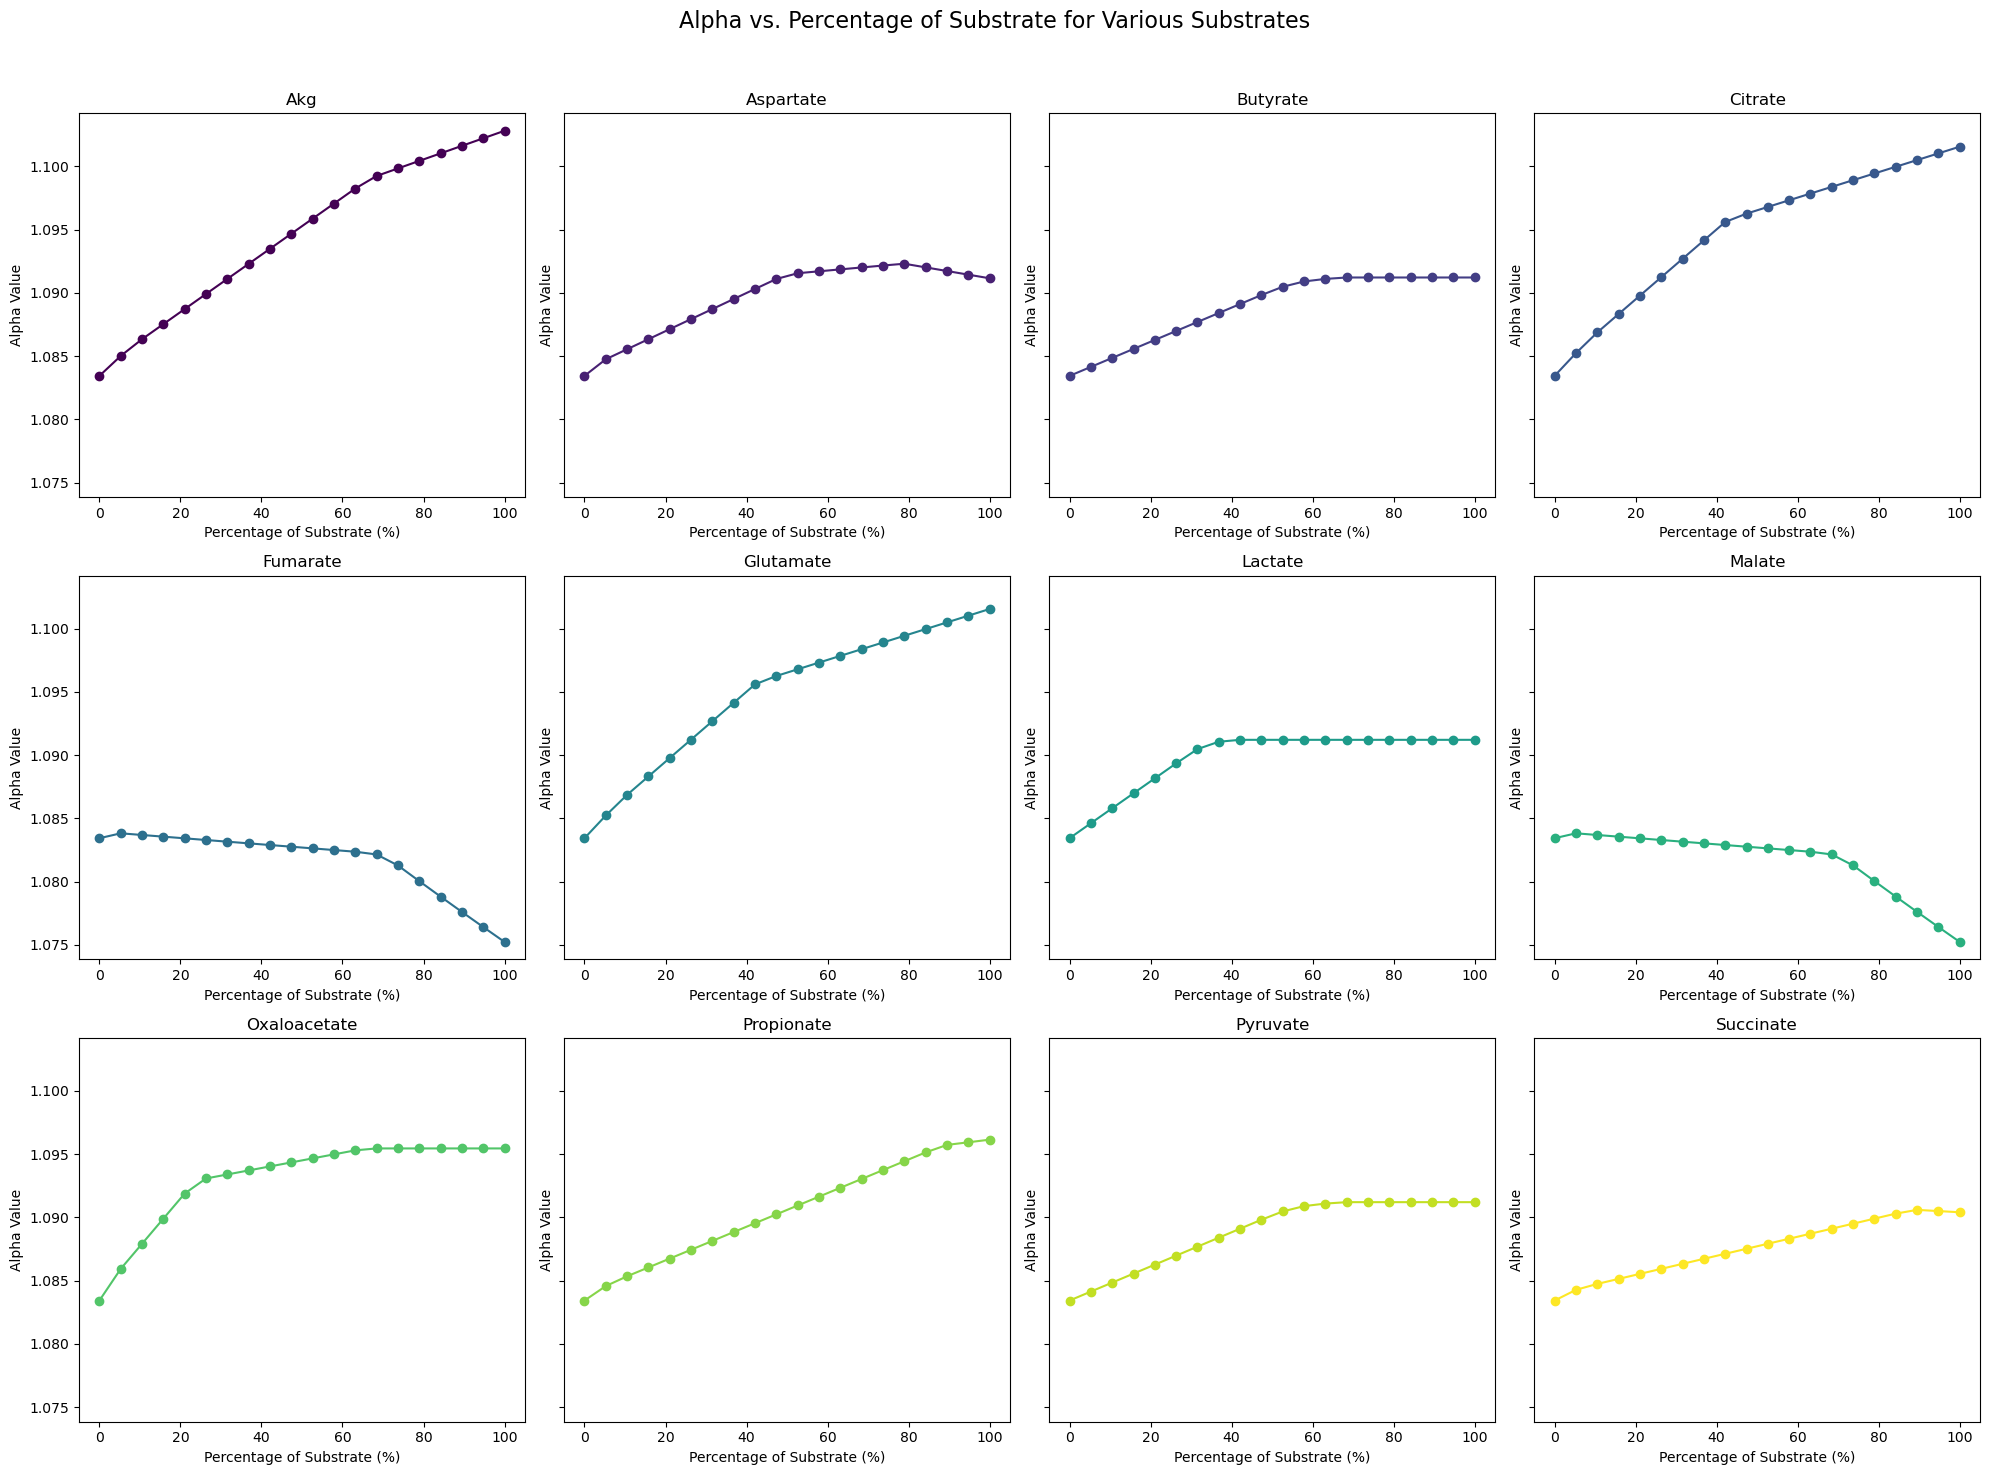

In [23]:
def plot_subplots(results):
    n_substrates = len(results)
    n_cols = 4
    n_rows = (n_substrates + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 15), sharey=True)
    fig.suptitle('Alpha vs. Percentage of Substrate for Various Substrates', fontsize=16)

    colors = plt.cm.viridis(np.linspace(0, 1, n_substrates))
    
    for ax, (substrate, data), color in zip(axes.flatten(), results.items(), colors):
        alpha_values = data['alpha_values']
        perc_substrate = data['perc_substrate']
        ax.plot(perc_substrate, alpha_values, marker='o', linestyle='-', color=color)
        ax.set_title(substrate.capitalize())
        ax.set_xlabel('Percentage of Substrate (%)')
        ax.set_ylabel('Alpha Value')
#         ax.grid(True)

    # Hide any empty subplots
    for ax in axes.flatten()[n_substrates:]:
        fig.delaxes(ax)

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

plot_subplots(results)
